# Visualization


<div style="border-left: 5px solid #787878ff; padding: 0.5em; background: #ebebebff;">

**Example Datasets:**
Zhu, F. & Zhu, J. Long simulations of the Miocene Climatic Optimum, DOI: 10.5065/3QFN-GN70 (2025). https://rda.ucar.edu/datasets/d010026/.
</div>

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import x4c
print(x4c.__version__)

2025.6.22


## Loading a netCDF file as an `xarray.Dataset`

The `x4c.load_dataset()` function is an enhanced version of `xarray.load_dataset()` for CESM output.
The users may specify the component (`comp`) and grid (`grid`) information while loading the file.

In [ ]:
dirpath = '/glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.cam.h0.TS.895101-900012.nc'
ds = x4c.load_dataset(
    os.path.join(dirpath, 'atm/proc/tseries/month_1', fname),
    comp='atm',
    grid='ne16np4',
)
ds

<xarray.Dataset> Size: 34MB
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 240B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 248B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 8951-02-01 00:00:00 ... 9001-01-01 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/31)
    hyam          (lev) float64 240B 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 240B 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0            float64 8B 1e+05
    hyai          (ilev) float64 248B 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (ilev) float64 248B 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    lat           (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 36.74
    ...            ...
    n2ovmr        (time) float64 5kB 2.757e-07 2.757e-07 ... 2.757e-07 2.757e-07
    f11vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 5kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 2kB 156805488 156806832 ... 157678512 157680000
    TS            (time, ncol) float32 33MB 303.9 303.3 302.5 ... 292.6 293.3
Attributes: (12/18)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    path:             /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13...
    comp:             atm
    grid:             ne16np4
    gw:               <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\nar...
    lat:              <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narr...
    lon:              <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narr...

## Publication-ready Visualization

With `x4c`, publication-ready figures can be generated with a simple call of `plot()` for various types of data.

In [31]:
da_clim = da.x.regrid().mean('time')
da_clim

<xarray.DataArray 'TS' (lat: 180, lon: 360)> Size: 259kB
array([[255.93816, 255.93839, 255.93898, ..., 255.93898, 255.93839,
        255.93816],
       [255.59033, 255.59033, 255.59033, ..., 255.59033, 255.59033,
        255.59033],
       [255.55145, 255.55174, 255.55206, ..., 255.55206, 255.55174,
        255.55145],
       ...,
       [279.70557, 279.7059 , 279.70642, ..., 279.70642, 279.7059 ,
        279.70557],
       [279.76398, 279.76398, 279.76398, ..., 279.76398, 279.76398,
        279.76398],
       [279.80237, 279.80237, 279.8024 , ..., 279.8024 , 279.80237,
        279.80237]], shape=(180, 360), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    path:          /glade/campaign/cesm/community/palwg/MCO_LongSims/b.e13.B1...
    gw:            <xarray.DataArray 'area' (ncol: 13826)> Size: 111kB\narray...
    comp:          atm
    grid:          ne16np4

Xarray provides a barebone plotting feature:

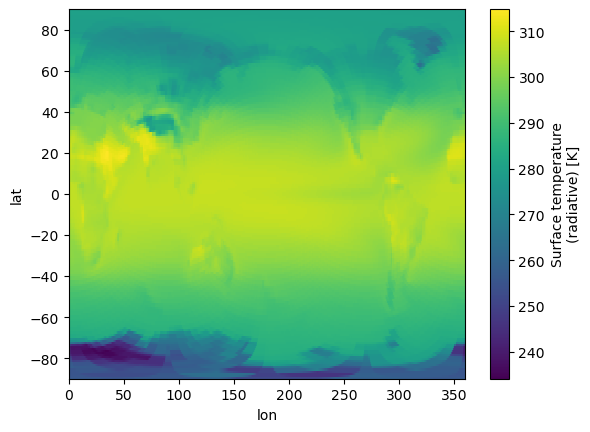

In [32]:
da_clim.plot()

In constrast, `x4c` generates publication-ready plots:

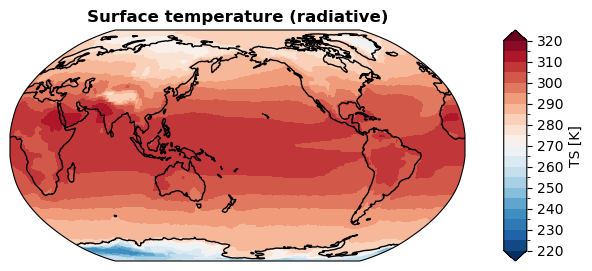

In [38]:
fig, ax = da_clim.x.plot(
    levels=np.linspace(220, 320, 21),
    cbar_kwargs={'ticks': np.linspace(220, 320, 11)},
)